# CNN for Digit Recognition

**Run with theano backend for keras**

modify keras.json as  https://keras.io/backend/

## 1. load data

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digit = load_digits()

data_x = digit.data
data_y = digit.target


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

## 2. data preprocess

In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 8, 8


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (1437, 8, 8, 1)
1437 train samples
360 test samples


## 3. CNN model

In [85]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
convout1 = Activation('relu')
model.add(convout1)

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## 4. train & test

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1437 samples, validate on 360 samples
Epoch 1/1
1437/1437 [==============================] - 462s - loss: 2.3010 - acc: 0.1287 - val_loss: 2.3000 - val_acc: 0.3056
Test loss: 2.30000511805
Test accuracy: 0.305555555556


# 6. parameter visualize

## 6.1 Visualize Conv layer conv-kernel weights

In [58]:
# Visualize weights
import numpy as np
W = model.layers[0].kernel.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

W shape :  (3, 3, 32)


** 32 pictures with 3x3 matrix  **

In [62]:
W[:,:,0]# image 0

array([[ 0.0096919 , -0.03014735, -0.08321077],
       [-0.05278988, -0.02429212, -0.01528582],
       [ 0.11927827,  0.01094254, -0.07887723]], dtype=float32)

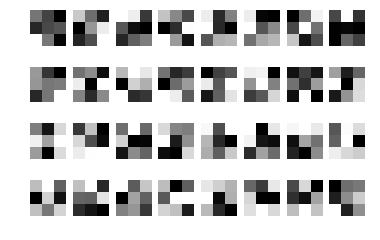

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(32):
    sub = plt.subplot(4,8,i+1)
    plt.axis('off')
    sub.imshow(W[:,:,i], cmap=plt.cm.gray)

## 6.2 Visualize Conv layer output

In [64]:
convout1_f = theano.function(model.inputs, [convout1.output])

C1 = convout1_f([x_train[0]])
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

C1 shape :  (6, 6, 32)


**32 pics with 6x6 matrix**

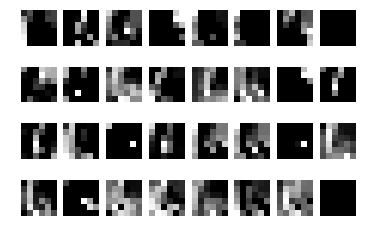

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(32):
    sub = plt.subplot(4,8,i+1)
    plt.axis('off')
    sub.imshow(C1[:,:,i], cmap=plt.cm.gray)